 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [62]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [63]:
# Reading whale returns

whale_path = Path('./Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [64]:
# Count nulls

whale_null_count = whale_df.isnull().sum()
whale_null_count

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [65]:
# Drop nulls

whale_df = whale_df.dropna()
whale_nonull_count = whale_df.isnull().sum()
whale_nonull_count

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [66]:
# Reading algorithmic returns

algo_path = Path('./Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [67]:
# Count nulls

algo_null_count = algo_df.isnull().sum()
algo_null_count

Algo 1    0
Algo 2    6
dtype: int64

In [68]:
# Drop nulls

algo_df = algo_df.dropna()
algo_nonull_count = algo_df.isnull().sum()
algo_nonull_count

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [69]:
# Reading S&P 500 Closing Prices

sp_path = Path('./Resources/sp500_history.csv')
sp_df = pd.read_csv(sp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [70]:
# Check Data Types

sp_type = sp_df.dtypes
algo_type = algo_df.dtypes
whale_type = whale_df.dtypes

sp_type # will show 'object'
#algo_type # will show 'float64'
#whale_type # will show 'float64'

# debugfunctions

Close    object
dtype: object

In [71]:
# Fix Data Types

sp_df = sp_df['Close'].str.replace('$', '', regex=True).astype(float)
sp_df

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [72]:
# Calculate Daily Returns

sp_daily_rtn = sp_df.pct_change()
algo_daily_rtn = algo_df.pct_change()
whale_daily_rtn = whale_df.pct_change()

# sp_daily_rtn # will show 'S&P 500 Daily Returns'
# algo_daily_rtn # will show 'Alogrithm Daily Returns'
# whale_daily_rtn # will show 'Whale Daily Returns'

In [73]:
# Drop nulls
# daily_rtn.isna().sum()

sp_df = sp_df.dropna()
daily_null_chk = sp_df.isnull().sum()
# daily_null_chk # will show 'Amount of Dulls from S&P No Nulls"

In [74]:
# Rename `Close` Column to be specific to this portfolio.

# sp_df = sp_df.rename(columns={'Close': 'SP'}, inplace=True)

sp_df.name = 'SP500'

## Combine Whale, Algorithmic, and S&P 500 Returns

In [75]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combine = pd.concat([whale_df,algo_df,sp_df], axis="columns", join="inner")
combine

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [76]:
# Plot daily returns of all portfolios
daily_rtn_all = combine.pct_change()
daily_rtn_all.head()
# np.dot(portsonly, 

# daily_rtn_plot = daily_rtn_all.plot()
# daily_rtn_plot

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944


#### Calculate and Plot cumulative returns.

In [78]:
# Calculate cumulative returns of all portfolios

cumrtn = (1 + combine).cumprod() - 1
cumrtn.head()

# # Plot cumulative return

cumul_plot = cumrtn.plot
cumul_plot

---

# Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


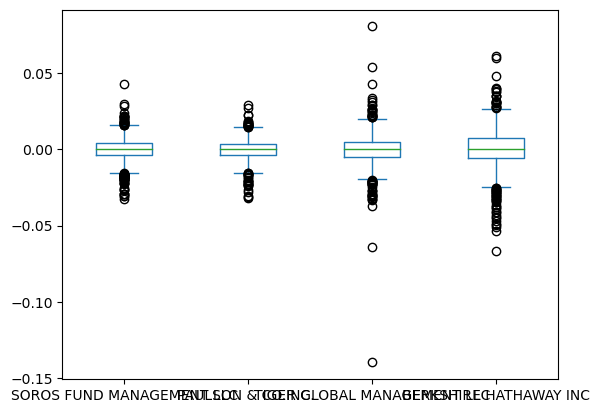

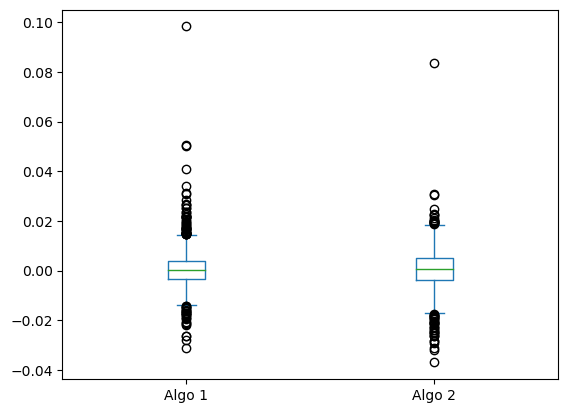

In [79]:
# Box plot to visually show risk

whale_bp = whale_df.plot.box()
algo_bp = algo_df.plot.box()

# a = combine.iloc('Class').plot(box)
# b = combine[2].plot(box)
# c = combine[3].plot(box)

#  Create a figure and axis
# fig, ax = plt.subplots()

# # # Create the box plot
# ax.boxplot(risk_values)

# # # Add labels and title
# ax.set_xlabel('Risk')
# ax.set_ylabel('Value')
# ax.set_title('Box Plot of Risk')

# # Display the plot
# plt.show()


### Calculate Standard Deviations

In [80]:
# Calculate the daily standard deviations of all portfolios

all_daily_std = combine.std()
all_daily_std

# combine.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC        0.007895
PAULSON & CO.INC.                0.007023
TIGER GLOBAL MANAGEMENT LLC      0.010894
BERKSHIRE HATHAWAY INC           0.012919
Algo 1                           0.007620
Algo 2                           0.008342
SP500                          305.852115
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [81]:
# Calculate  the daily standard deviation of S&P 500

sp_daily = sp_df.std()
sp_daily

# Determine which portfolios are riskier than the S&P 500

portfolios_only = pd.concat([whale_df,algo_df], axis="columns", join="inner")

daily_std = portfolios_only.std().sort_values(ascending=False)
daily_std

# variance = combine['Close'].var()
# variance

# covariance = combine['Close'].cov(combine['Algo'])
# covariance

# risky_ports = portsonly.std().sort_values(ascending=False)
# risky_ports

# test = sp_nonull.std()
# test.dtypes

# plot_corr = port_risk_corr.plot()
# plot_corr

# correlation = combine.corr(df_combined[1])
# correlation


BERKSHIRE HATHAWAY INC         0.012892
TIGER GLOBAL MANAGEMENT LLC    0.010876
Algo 2                         0.008327
SOROS FUND MANAGEMENT LLC      0.007879
Algo 1                         0.007601
PAULSON & CO.INC.              0.007010
dtype: float64

In [82]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_std.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratio

BERKSHIRE HATHAWAY INC         11.202312
TIGER GLOBAL MANAGEMENT LLC    13.278777
Algo 2                         17.343431
SOROS FUND MANAGEMENT LLC      18.328773
Algo 1                         19.000182
PAULSON & CO.INC.              20.601469
dtype: float64

### Calculate the Annualized Standard Deviation

In [83]:
# Calculate the annualized standard deviation (252 trading days)

ann_std = daily_std * np.sqrt(252)
ann_std

BERKSHIRE HATHAWAY INC         0.204650
TIGER GLOBAL MANAGEMENT LLC    0.172648
Algo 2                         0.132186
SOROS FUND MANAGEMENT LLC      0.125080
Algo 1                         0.120660
PAULSON & CO.INC.              0.111281
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

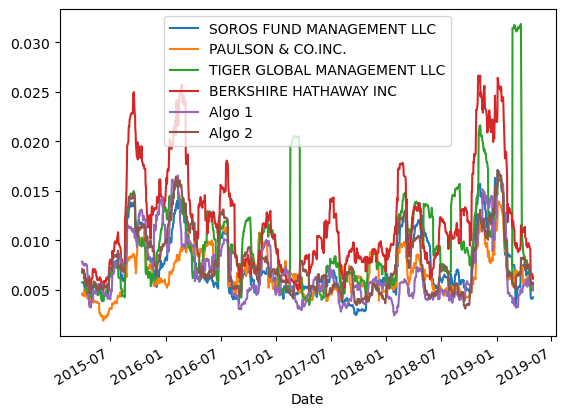

In [84]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

all_port_roll_std = portfolios_only.rolling(window=21).std()

# Plot the rolling standard deviation

all_port_roll_std.plot()

### Calculate and plot the correlation

In [85]:
# Calculate the correlation

correlation = combine.corr()

# Display de correlation matrix

correlation

# Calculate the correlation coefficient


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.033918
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.036711
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.047823
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.041547
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.012608
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.036267
SP500,0.033918,0.036711,-0.047823,0.041547,-0.012608,0.036267,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [86]:
# Calculate covariance of a single portfolio

covariance = combine['Algo 1'].cov(combine['SP500'])
covariance

# Calculate variance of S&P 500

variance = combine['SP500'].var()
variance

# Computing beta

beta = covariance / variance

# Plot beta trend

beta

-3.1412013159483234e-07



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [87]:
# Use `ewm` to calculate the rolling window



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [88]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_std.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratio

BERKSHIRE HATHAWAY INC         11.202312
TIGER GLOBAL MANAGEMENT LLC    13.278777
Algo 2                         17.343431
SOROS FUND MANAGEMENT LLC      18.328773
Algo 1                         19.000182
PAULSON & CO.INC.              20.601469
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

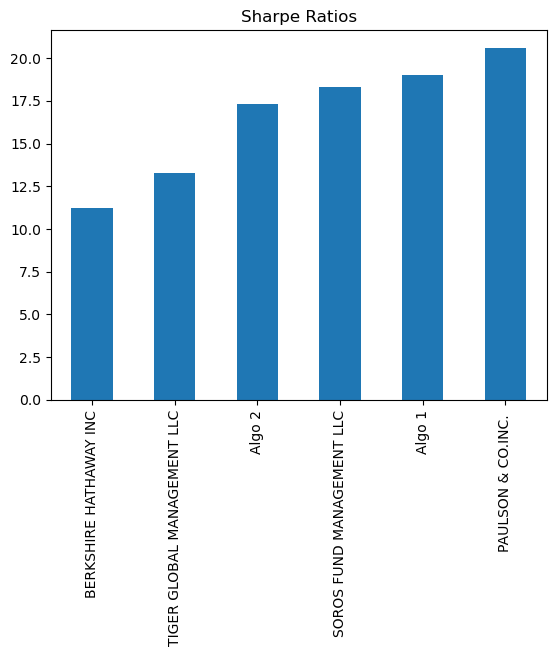

In [89]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [108]:
# Reading data from 1st stock

tsla_path = Path('./Resources/tsla_google_finance.csv')
tsla_path
# tsla = pd.read_csv(tsla_path)

PosixPath('Resources/tsla_google_finance.csv')

In [59]:
# Reading data from 2nd stock

Rivian


NameError: name 'Rivian' is not defined

In [ ]:
# Reading data from 3rd stock

Ford


In [ ]:
# Combine all stocks in a single DataFrame

EV = pd.concat(


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

my_portfolio_returns = portfolios_only.dot(weights)

# Display sample data

my_portfolio_returns

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!